# **CNN+BLSTM ~ FRENCH**

*IMPORT PACKAGES AND LIBRARIES*

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from nltk import word_tokenize
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Bidirectional

*LOAD FRENCH DATASET*

In [ ]:
#LOAD THREE DATASETS
data=pd.read_csv('/content/drive/MyDrive/thesiss/French.csv')

*TOTAL NUMBER OF FAKE AND TRUE NEWS*

In [ ]:
data

,Fake,text,clean_with_stopwords,final_clean
0,0,Il tente d'incendier sa femme : elle est indem...,il tente de incendier son femme lui être indem...,tente incendier femme indemne gravement bruler...
1,0,"Ça y est, Renaud a fait son retour sur scène !...",cela y être renaud avoir faire son retour sur ...,etre renaud avoir faire retour scene octobre a...
2,0,"Avec son tailleur rouge, quel message a voulu ...",avec son tailleur rouge quel message avoir vou...,tailleur rouge message avoir vouloir envoyer h...
3,0,Foot-Ligue 1 : tous les résultats de la 8ème j...,foot ligue tout le résultat de le èm journée h...,foot ligue tout resultat eme journee octobre m...
4,0,× S'abonner au podcast \nVous pouvez vous abon...,se abonner au podcast vous pouvoir vous abonne...,abonner podcast pouvoir abonner telechargement...
...,...,...,...,...
27811,1,97% de Libanaises refaites : L’ONU demande au ...,pourcent de libanais refaire l onu demande au ...,pourcent libanais refaire onu demande liban ar...
27812,1,Un réfugié syrien humilie et empêche une famil...,un réfugié syrien humilier et empêche un famil...,refugier syrien humilier empeche famill rom tr...
27813,1,Mehdi Meklat lance une banane à Christiane Tau...,mehdi meklat lance un banane à christiane taub...,mehdi meklat lance banane christiane taubira a...
27814,1,"En visite en Afghanistan, Marine Le Pen refuse...",en visite en afghanistan marine le pen refuse ...,visite afghanistan marine pen refuse participe...


In [ ]:
data['Fake'].value_counts()

1    14487
0    13329
Name: Fake, dtype: int64

In [ ]:
docs = data.clean_with_stopwords.values
labels = data.Fake.values

*TOKENIZATION*

In [ ]:
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1  # I add one because it starts counting from 0

*DIVIDE DATA INTO TRAIN/VALIDATE/TEST*

In [ ]:
# divide the data into train/validate

from sklearn.model_selection import train_test_split


sentences_train, sentences_valid, y_train, y_valid = train_test_split(
    docs, labels, test_size=0.20, random_state=1000)

*PADDING: USE KERAS TOKENIZER TO TURN TRAIN AND VALID DOCS TO SEQUENCES*

In [ ]:
X_train = t.texts_to_sequences(sentences_train)
X_valid = t.texts_to_sequences(sentences_valid)


print(sentences_train[2])
print(X_train[2])

jessica leeds an ancien femme de affaire lieu dans un avion date au début de année accusation il être comme un pieuvre son main être partout source le new york time rachel crook le trentaine réceptionniste à le époque lieu à le sortie de un ascenseur de le trump tower à new york date accusation après avoir simplement faire connaissance et échanger un poignée de main il me avoir embrasser directement sur le bouche source le new york time jill harth travailler pour un concours de beauté lieu à mar avoir lago le domaine de trump en floride date janvier accusation je admirer le décoration et le seul chose dont je me souvenir ensuite ce être que il me pousse contre un mur et mettre son main partout sur moi source le new york time mindy mcgillivray an qui être assister photographe lieu à mar avoir lago le domaine de trump en floride date janvier accusation ce être plutôt un pelotage appuyé plus que un simple attouchement ce être très près de centre de mon fesse je être abasourdir source le p

In [ ]:
maxlen = 3527

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_valid = pad_sequences(X_valid, padding='post', maxlen=maxlen)

print(X_train[1, :])

[15564 11988     2 ...     0     0     0]


*CREATE A MATRIX OF EMBEDDINGS*

In [ ]:
!pip install -U pip setuptools wheel

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
     |████████████████████████████████| 952 kB 49.8 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install -U spacy

     |████████████████████████████████| 6.0 MB 4.8 MB/s            
     |████████████████████████████████| 42 kB 1.3 MB/s             
     |████████████████████████████████| 10.1 MB 52.9 MB/s            
     |████████████████████████████████| 181 kB 67.2 MB/s            
     |████████████████████████████████| 628 kB 54.8 MB/s            
     |████████████████████████████████| 451 kB 60.7 MB/s            
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uni

In [ ]:
!python -m spacy download fr_core_news_sm

     |████████████████████████████████| 17.4 MB 392 kB/s            
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [ ]:
import spacy
from spacy import displacy

In [ ]:
nlp = spacy.load('fr_core_news_sm')

In [ ]:
nlp('2000 suis')[1].lemma_

'être'

In [ ]:
import re 

def clean_data(text):
    text = text.lower()
    text = re.sub(r'<br />', ' ', text) #Removes Html tag
    text = re.sub(r'[^\ a-zá-úà-ùä-üâ-ûã-õ]+', '', text)  #Removes non-alphabetic characters
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ',text)
 
    text = re.sub(r'^\s*|\s\s*', ' ', text).strip() #Removes extra whitespace, tabs
   
    if len(text)>1:
    #print(text,nlp(text))
      text=nlp(str(text))[0].lemma_

    return text

In [ ]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            word=clean_data(word)
        
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
            # else:
            #   print(word)

    return embedding_matrix

*LOAD PRE-TRAINED WORD EMBEDDINGS ~ 300 DIMENSIONS*

In [ ]:
embedding_dim = 300
embedding_matrix = create_embedding_matrix(
        '/content/drive/MyDrive/thesiss/cc.fr.300.vec',
        t.word_index, embedding_dim)

*HOW MANY OF THE EMBEDDING VECTORS ARE NON-ZERO*

In [ ]:
# how many of the embedding vectors are nonzero

nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.7747782491322792

*NEURAL NETWORK*

In [ ]:
from keras.models import Sequential
from keras import layers
model = Sequential()
import tensorflow as tf

In [ ]:
import tensorflow as tf
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam,SGD

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen, trainable=True),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv1D(64, 2, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(40, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(40)),
    tf.keras.layers.Dropout(0.1),  
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),  
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam=Adam(learning_rate=0.0001)
model.compile(optimizer=adam,
               loss='binary_crossentropy',
               metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 3527, 300)         39554100  
                                                                 
 dropout_6 (Dropout)         (None, 3527, 300)         0         
                                                                 
 conv1d_2 (Conv1D)           (None, 3526, 64)          38464     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 881, 64)          0         
 1D)                                                             
                                                                 
 bidirectional_4 (Bidirectio  (None, 881, 80)          33600     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 80)              

*TRAIN THE MODEL*

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=4,
                    verbose=True,
                    validation_data=(X_valid, y_valid),
                    batch_size=128)

Epoch 1/7
174/174 [==============================] - 64s 322ms/step - loss: 0.5747 - accuracy: 0.7164 - val_loss: 0.2523 - val_accuracy: 0.9136
Epoch 2/7
174/174 [==============================] - 55s 315ms/step - loss: 0.1571 - accuracy: 0.9513 - val_loss: 0.0937 - val_accuracy: 0.9693
Epoch 3/7
174/174 [==============================] - 55s 315ms/step - loss: 0.0561 - accuracy: 0.9856 - val_loss: 0.0706 - val_accuracy: 0.9790
Epoch 4/7
174/174 [==============================] - 55s 316ms/step - loss: 0.0265 - accuracy: 0.9938 - val_loss: 0.0622 - val_accuracy: 0.9829
Epoch 5/7
174/174 [==============================] - 55s 316ms/step - loss: 0.0160 - accuracy: 0.9968 - val_loss: 0.0895 - val_accuracy: 0.9727
Epoch 6/7
174/174 [==============================] - 55s 317ms/step - loss: 0.0093 - accuracy: 0.9982 - val_loss: 0.0715 - val_accuracy: 0.9822
Epoch 7/7
174/174 [==============================] - 55s 317ms/step - loss: 0.0069 - accuracy: 0.9987 - val_loss: 0.0678 - val_accuracy:

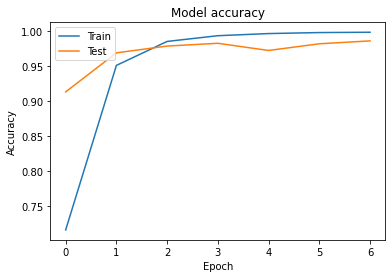

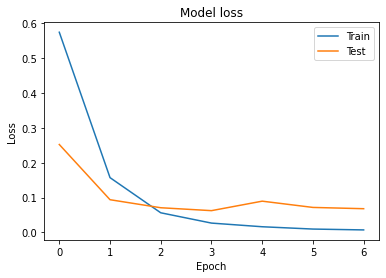

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
y_pred_valid=(model.predict(X_valid)>0.5).astype(int)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_valid,y_pred_valid))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2637
           1       0.99      0.99      0.99      2927

    accuracy                           0.99      5564
   macro avg       0.99      0.99      0.99      5564
weighted avg       0.99      0.99      0.99      5564



In [ ]:
confusion_matrix(y_valid,y_pred_valid)

array([[2600,   37],
       [  39, 2888]])

In [ ]:
model.save('model1')
loaded_model=tf.keras.models.load_model('model1')

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets
